In [85]:
import pandas as pd

hc = pd.read_csv("hc_data.csv")
hc_sigmoid = hc.copy()[["CP_pre", "CP_post", "Slope_pre", "Slope_post"]]
hc_pre_loom = hc.copy()[
    ["Pre_Loom_300", "Pre_Loom_800", "Pre_Loom_1500", "Pre_Loom_2200", "Pre_Loom_2700"]
]
hc_post_loom = hc.copy()[
    [
        "Post_Loom_300",
        "Post_Loom_800",
        "Post_Loom_1500",
        "Post_Loom_2200",
        "Post_Loom_2700",
    ]
]
hc_sigmoid["ymin_pre"] = hc_pre_loom.min(axis=1)
hc_sigmoid["ymax_pre"] = hc_pre_loom.max(axis=1)
hc_sigmoid["ymin_post"] = hc_post_loom.min(axis=1)
hc_sigmoid["ymax_post"] = hc_post_loom.max(axis=1)

hc_sigmoid.median()

CP_pre        1448.0000
CP_post        920.5000
Slope_pre       -0.0435
Slope_post      -0.0850
ymin_pre       263.0000
ymax_pre       331.5000
ymin_post      265.0000
ymax_post      328.5000
dtype: float64

In [84]:
scz = pd.read_csv("scz_data.csv")
scz_sigmoid = scz.copy()[["CP_pre", "CP_post", "Slope_pre", "Slope_post"]]
scz_pre_loom = scz.copy()[
    ["Pre_Loom_300", "Pre_Loom_800", "Pre_Loom_1500", "Pre_Loom_2200", "Pre_Loom_2700"]
]
scz_post_loom = scz.copy()[
    [
        "Post_Loom_300",
        "Post_Loom_800",
        "Post_Loom_1500",
        "Post_Loom_2200",
        "Post_Loom_2700",
    ]
]
scz_sigmoid["ymin_pre"] = scz_pre_loom.min(axis=1)
scz_sigmoid["ymax_pre"] = scz_pre_loom.max(axis=1)
scz_sigmoid["ymin_post"] = scz_post_loom.min(axis=1)
scz_sigmoid["ymax_post"] = scz_post_loom.max(axis=1)

scz_sigmoid.median()

CP_pre        1715.5000
CP_post       1206.5000
Slope_pre       -0.0500
Slope_post      -0.0525
ymin_pre       376.0000
ymax_pre       431.0000
ymin_post      353.0000
ymax_post      440.5000
dtype: float64

<Axes: xlabel='CP_pre', ylabel='Count'>

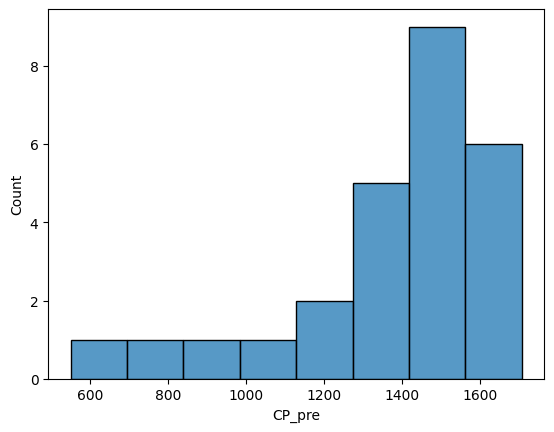

In [24]:
import seaborn as sns

sns.histplot(hc_sigmoid["CP_pre"])

<Axes: xlabel='CP_post', ylabel='Count'>

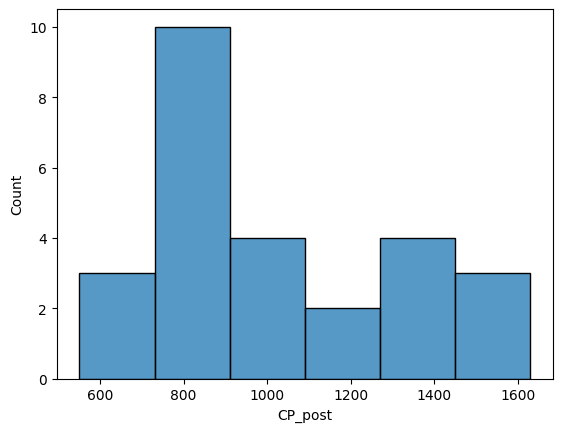

In [25]:
sns.histplot(hc_sigmoid["CP_post"])

<Axes: xlabel='Slope_pre', ylabel='Count'>

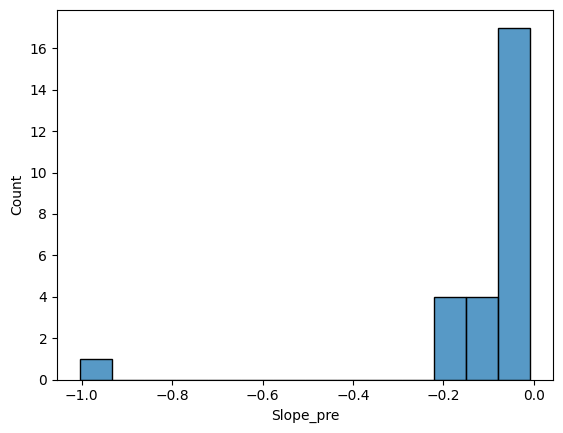

In [26]:
sns.histplot(hc_sigmoid["Slope_pre"])

<Axes: xlabel='Slope_post', ylabel='Count'>

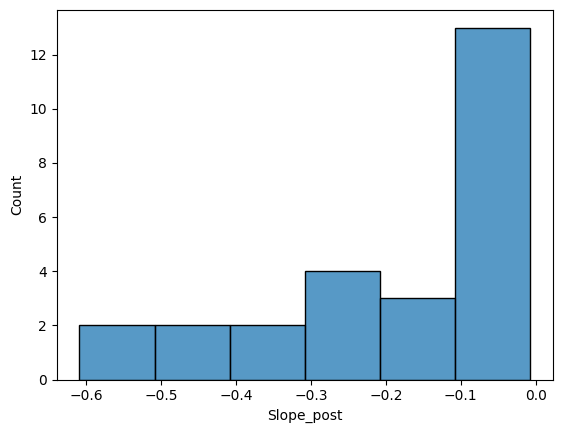

In [27]:
sns.histplot(hc_sigmoid["Slope_post"])

In [20]:
import scipy

scipy.stats.wilcoxon(hc_sigmoid["Slope_pre"], hc_sigmoid["Slope_post"])

WilcoxonResult(statistic=np.float64(111.5), pvalue=np.float64(0.10403442918132004))

In [35]:
scipy.stats.wilcoxon(hc_sigmoid["CP_pre"], hc_sigmoid["CP_post"])

WilcoxonResult(statistic=np.float64(39.0), pvalue=np.float64(0.0008905376442220464))

<Axes: xlabel='CP_pre', ylabel='Count'>

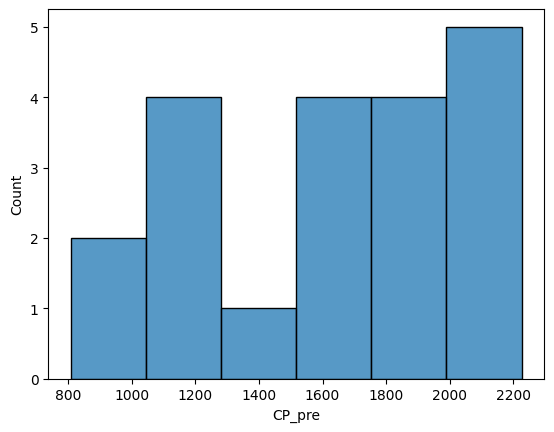

In [29]:
sns.histplot(scz_sigmoid["CP_pre"])

<Axes: xlabel='CP_post', ylabel='Count'>

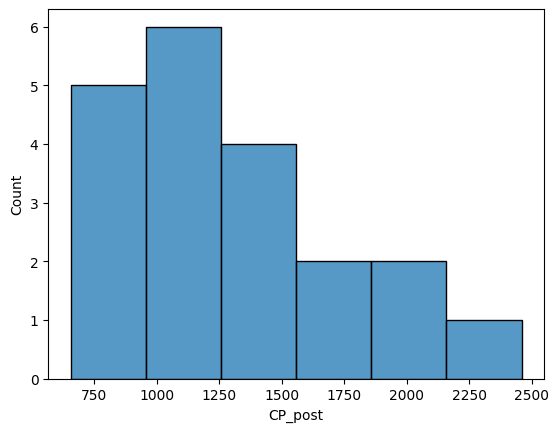

In [30]:
sns.histplot(scz_sigmoid["CP_post"])

<Axes: xlabel='Slope_pre', ylabel='Count'>

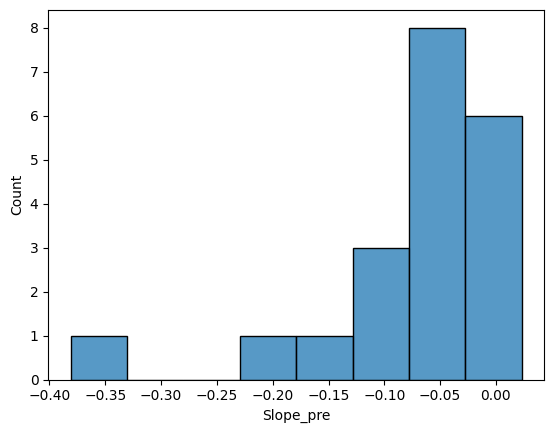

In [32]:
sns.histplot(scz_sigmoid["Slope_pre"])

<Axes: xlabel='Slope_post', ylabel='Count'>

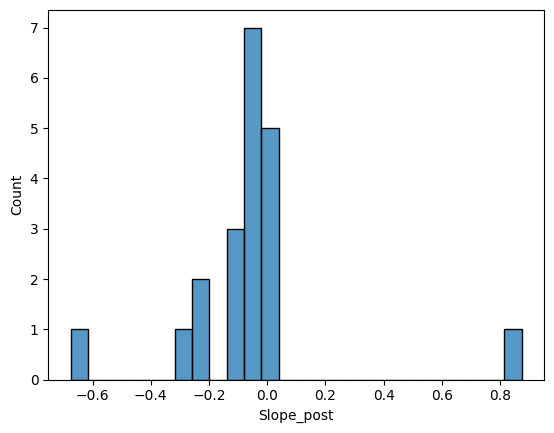

In [33]:
sns.histplot(scz_sigmoid["Slope_post"])

In [34]:
scipy.stats.wilcoxon(scz_sigmoid["CP_pre"], scz_sigmoid["CP_post"])

WilcoxonResult(statistic=np.float64(44.0), pvalue=np.float64(0.021484375))

In [ ]:
scipy.stats.wilcoxon(scz_sigmoid["Slope_pre"], scz_sigmoid["Slope_post"])

WilcoxonResult(statistic=np.float64(99.0), pvalue=np.float64(0.8408222198486328))

## Group Comparison

MannwhitneyuResult(statistic=np.float64(164.0), pvalue=np.float64(0.034327769772135766))

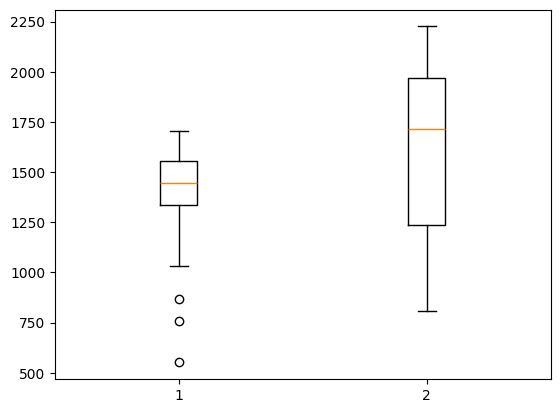

In [46]:
import matplotlib.pyplot as plt

plt.boxplot([hc_sigmoid["CP_pre"], scz_sigmoid["CP_pre"]])
scipy.stats.mannwhitneyu(hc_sigmoid["CP_pre"], scz_sigmoid["CP_pre"])

MannwhitneyuResult(statistic=np.float64(231.5), pvalue=np.float64(0.5348438036620644))

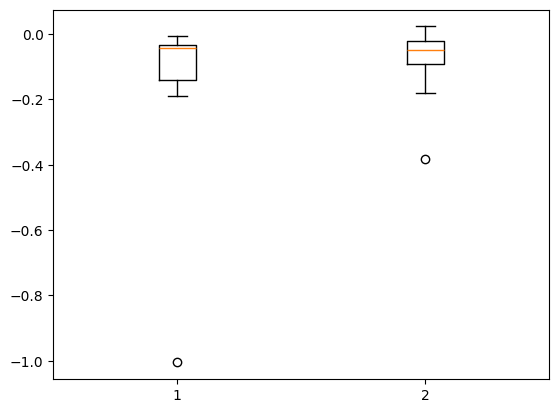

In [47]:
plt.boxplot([hc_sigmoid["Slope_pre"], scz_sigmoid["Slope_pre"]])
scipy.stats.mannwhitneyu(hc_sigmoid["Slope_pre"], scz_sigmoid["Slope_pre"])

MannwhitneyuResult(statistic=np.float64(162.0), pvalue=np.float64(0.030737689432598664))

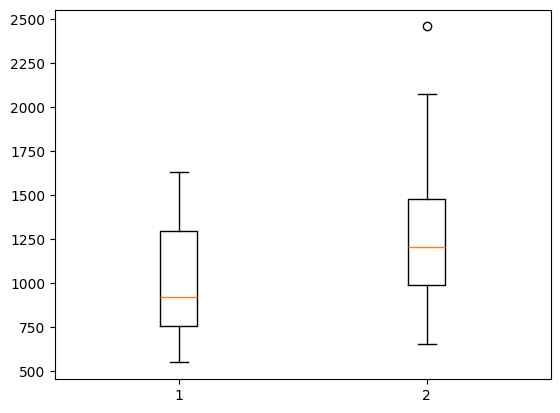

In [48]:
plt.boxplot([hc_sigmoid["CP_post"], scz_sigmoid["CP_post"]])
scipy.stats.mannwhitneyu(hc_sigmoid["CP_post"], scz_sigmoid["CP_post"])

MannwhitneyuResult(statistic=np.float64(186.5), pvalue=np.float64(0.10571243219918505))

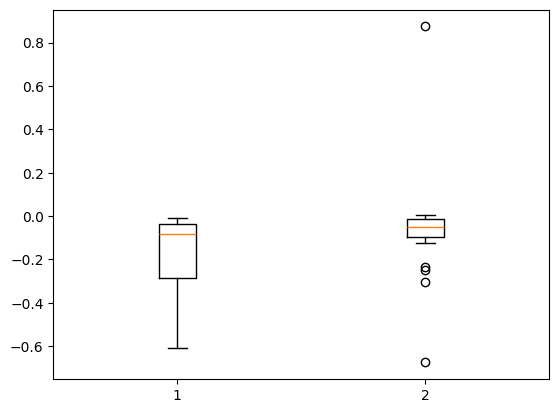

In [49]:
plt.boxplot([hc_sigmoid["Slope_post"], scz_sigmoid["Slope_post"]])
scipy.stats.mannwhitneyu(hc_sigmoid["Slope_post"], scz_sigmoid["Slope_post"])

### Deltas

MannwhitneyuResult(statistic=np.float64(284.5), pvalue=np.float64(0.5948506775062268))

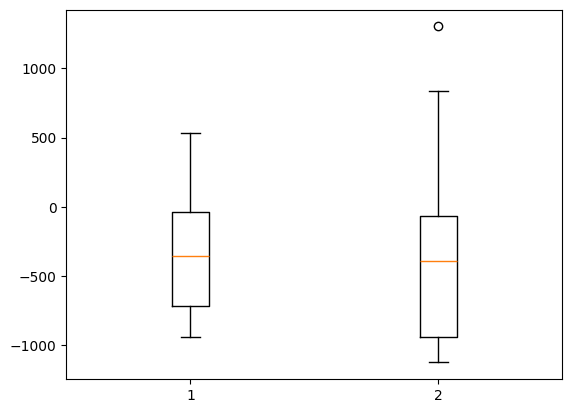

In [90]:
plt.boxplot(
    [
        hc_sigmoid["CP_post"] - hc_sigmoid["CP_pre"],
        scz_sigmoid["CP_post"] - scz_sigmoid["CP_pre"],
    ]
)
scipy.stats.mannwhitneyu(
    hc_sigmoid["CP_post"] - hc_sigmoid["CP_pre"],
    scz_sigmoid["CP_post"] - scz_sigmoid["CP_pre"],
)

MannwhitneyuResult(statistic=np.float64(223.0), pvalue=np.float64(0.41862469324970386))

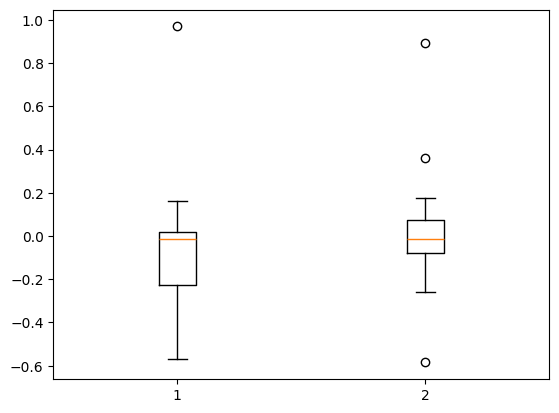

In [89]:
plt.boxplot(
    [
        hc_sigmoid["Slope_post"] - hc_sigmoid["Slope_pre"],
        scz_sigmoid["Slope_post"] - scz_sigmoid["Slope_pre"],
    ]
)
scipy.stats.mannwhitneyu(
    hc_sigmoid["Slope_post"] - hc_sigmoid["Slope_pre"],
    scz_sigmoid["Slope_post"] - scz_sigmoid["Slope_pre"],
)